"#experimental data of eta\n#I_ac0=[0, 0, 8.9, 6.84, 5.45, 1.09]\nI_ac1 = [ 4e-06, 6.5e-06, 9e-06, 12e-06, 14.5e-06, 15e-06] \nI_ac2=  [ 4.7e-06, 6.9e-06, 9.1e-06, 11.3e-06, 13.8e-06 , 14.6e-06]\nI_ac3=  [ 5.4e-06, 7.4e-06, 9.2e-06, 11.1e-06, 13e-06, 13.8e-06] \nI_ac4=  [ 6.2e-06, 7.7e-06, 9.2e-06, 10.7e-06, 12.2e-06, 12.9e-06] \nI_ac5=  [ 7e-06, 8.2e-06, 9.3e-06, 10.4e-06, 11.5e-06, 12.2e-06] \nI_ac6=  [ 7.7e-06, 8.45e-06, 9.2e-06, 9.95e-06, 10.7e-06, 11.3e-06]\nI_ac7=  [ 8.5e-06, 8.87e-06, 9.24e-06, 9.63e-06, 10.07e-06, 10.4e-06] \n\n\neta1=[ 19.08, 11.89, 8.9, 6.84, 5.45, 1.09]\neta2=[ 32.02, 22.02, 17.27, 14.2, 11.2, 0.65]\neta3=[ 43.72, 30.03, 25.1, 21.1, 17.75, 9.32]\neta4=[ 48.79, 38.84, 32.76, 29, 25.3, 13.37]\neta5=[ 53.46, 45.09, 40.91, 37.07, 31.39, 9.4]\neta6=[ 61.1, 52.02, 49.43, 45.58, 40.69, 13.06]\neta7=[ 62.69, 58.28, 56, 53.18, 41.03, 11.66]\n    \naxs[3].plot(I_ac1, eta1,'o' ,c='tab:blue',label='I_dc=-0.7μA')\naxs[3].plot(I_ac2, eta2,'o' ,c='tab:orange', label='I_dc=

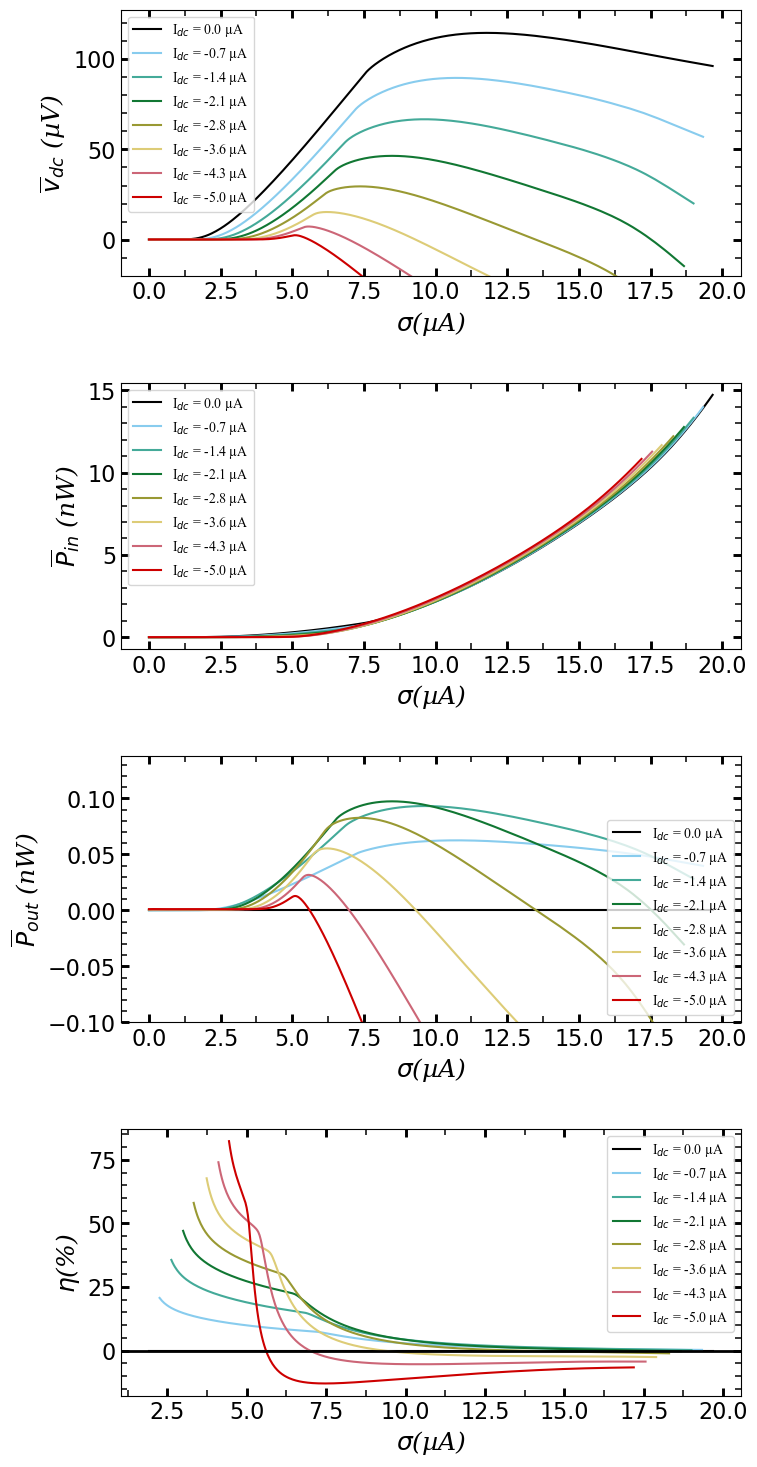

In [1]:
#Simulation of V_dc, P_out, P_in, efficiency from asymmetric IVC for different values of I_dc driven with Gaussian-amplitude
#vs its experimental finding!

#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import matplotlib.font_manager as fm


#save the files in my directory
path0 = '/Users/alirezajozani/Documents/1.4idc'
path1 = '/Users/alirezajozani/Documents/1.4idc'
path2 = '/Users/alirezajozani/Documents/1.4idc'
path3 = '/Users/alirezajozani/Documents/1.4idc'



fig, axs = plt.subplots(4, figsize=(10, 10), sharex=False, sharey=False)
axis_font = {'fontname':'Arial', 'size':'30'}
fig.set_size_inches(8, 18)
fig.subplots_adjust(wspace=0.4, hspace=0.4)
#gs = fig.add_gridspec(4, hspace=-2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
colors = ['black', '#88CCEE', '#44AA99', '#117733', '#999933', '#DDCC77', '#CC6677', '#CD0000']
#33228

#loading experimental data asymmetric IVC
data = np.loadtxt('205-IV_av@H=-69mA.dat')

# Extract the voltage and current columns from the data
voltage = data[:, 0]
current = data[:, 1]

# Check that the current values are increasing
diffs = np.diff(current)
if not np.any(diffs > 0):
    print("Error: The current values are not increasing!")
    

def fnV(I):
    # Check that I is within the range of current values in the data
    Imax = np.max(data[:, 1])
    Imin = np.min(data[:, 1])
    if not np.any((I >= Imin, I <= Imax)):
        raise ValueError("Error: I value out of range!")
    #np.clip(I, Imax, Imin)
    V = np.interp(I, data[:, 1], data[:, 0])
    return V

# Define the all the parameters
#sigma = 1e-05
#I_values = np.linspace(np.min(current), np.max(current), N)
N = 811
intLimit= 2  #integration of units of sigma
sigma_values = np.linspace(1e-12, 30e-06, 811)

#d_Iac =  (2 *intLimit*sigma)/N   (define it under the loop)



#idc_values = [-1.4e-06]
idc_values = [0, -0.7e-06, -1.4e-06, -2.1e-06, -2.8e-06, -3.6e-06, -4.3e-06, -5e-06]


Imin = np.min(current)
Imax = np.max(current)
#dI = (np.max(current) - np.min(current)) / (N)



meanV_values = np.full((len(idc_values), len(sigma_values)), np.nan)
meanP_values= np.full((len(idc_values), len(sigma_values)), np.nan)
meanPout_values= np.full((len(idc_values), len(sigma_values)), np.nan)
eta_values= np.full((len(idc_values), len(sigma_values)), np.nan)


for i, idc in enumerate(idc_values):
    for s, sigma in enumerate(sigma_values):
        d_Iac =  (2 *intLimit*sigma)/N
        if (Imin<= intLimit*sigma+idc <= Imax) and (Imin<= -intLimit*sigma+idc <= Imax):
            I_values = np.linspace(-intLimit*sigma, intLimit*sigma, N)
            meanV = 0
            meanPin = 0
            meanPout = 0
            eta = 0
            #NormalizedI=0
            for Iac in I_values:
                G = np.exp(-(Iac*Iac) / (2*sigma*sigma)) / (sigma*np.sqrt(2*np.pi))
                #NormalizedI += G*dIac
                V = fnV(Iac + idc )
                Vbar = (V*G) * d_Iac
                meanV += Vbar
                Pin = V*Iac*G*d_Iac
                meanPin += Pin
                meanPout += V*idc*G*d_Iac  # Accumulate meanPout values
            
            # Check if meanPin exceeds a maximum value
            max_meanPin = 1.0  # set the maximum allowed value for meanPin
            if meanPin > max_meanPin:
                meanPin = max_meanPin

            meanV_values[i, s] = meanV 
            meanP_values[i, s] = meanPin
            meanPout_values[i, s] = -meanPout  # Store meanPout values

    # Calculate efficiency
    for s, sigma in enumerate(sigma_values):
        if meanP_values[i, s] <= 5e-12 or np.isnan(meanP_values[i, s]) or np.isinf(meanP_values[i, s]) or np.isinf(meanPout_values[i, s]):
            eta = np.nan
        else:
            eta = meanPout_values[i, s] / meanP_values[i, s]
        
        # Apply a maximum value to eta if meanPin is greater than the cutoff
        if meanPin > max_meanPin:
            eta = min(eta, max_meanPin / meanPin)
        
        eta_values[i, s] = eta        
        
     # plot the results
    axs[0].plot(sigma_values*1e6, meanV_values[i]*1e06, color=colors[i % len(colors)], label=r'I$_{{dc}}$ = {:.1f} µA'.format(idc*1e6))
    np.savetxt(path0 + 'MeanV_values.dat', np.column_stack((sigma_values, meanV_values[i])), header='meanV_values')
    axs[1].plot(sigma_values*1e6, meanP_values[i]*1e9, color=colors[i % len(colors)], label=r'I$_{{dc}}$ = {:.1f} µA'.format(idc*1e6))
    np.savetxt(path1 + 'MeanP_values.dat', np.column_stack((sigma_values, meanP_values[i])), header='meanP_values')
    axs[2].plot(sigma_values*1e6, meanPout_values[i]*1e9, color=colors[i % len(colors)], label=r'I$_{{dc}}$ = {:.1f} µA'.format(idc*1e6))
    np.savetxt(path2 + 'MeanPout_values.dat', np.column_stack((sigma_values, meanPout_values[i])), header='meanPout_values')
    axs[3].plot(sigma_values*1e6, eta_values[i]*100, color=colors[i % len(colors)], label=r'I$_{{dc}}$ = {:.1f} µA'.format(idc*1e6))
    np.savetxt(path3 + 'Eta_alues.dat', np.column_stack((sigma_values, eta_values[i])), header='eta_values')
    # Save the data to a file
    
    
font_path = fm.findfont(fm.FontProperties(family="Times New Roman"))
serif_font = fm.FontProperties(fname=font_path)

    
# Format the plot
axs[0].yaxis.set_minor_locator(tck.AutoMinorLocator(5))
axs[0].xaxis.set_minor_locator(tck.AutoMinorLocator(2))
axs[0].tick_params(axis='x',which='minor', length=4, width=1.1, direction="in") # direction="in"
axs[0].tick_params(axis='x', which='major', length=6, width=2.1, direction='in')
axs[0].tick_params(axis='y',which='minor',  length=4, width=1.1, direction='in')
axs[0].tick_params(axis='y', which='major', length=6, width=2.1, direction='in')
axs[0].xaxis.set_ticks_position('default')
axs[0].yaxis.set_ticks_position('default')
axs[0].xaxis.set_tick_params(labelsize=16)
axs[0].yaxis.set_tick_params(labelsize=16)
axs[0].legend(loc='upper right', fontsize=13)
axs[0].set_xlabel("$\sigma$(µA)", fontname="serif",  style='italic', fontsize=18)
axs[0].set_ylabel( "$\overline{v}_{dc}$ (µV)", fontname="serif", style='italic', fontsize=18)
axs[0].xaxis.set_tick_params(labelsize=16)
axs[0].yaxis.set_tick_params(labelsize=16)
axs[0].legend(prop=serif_font, loc='upper left')
#axs[0].set_ylim(top=12)
axs[0].set_ylim(bottom=-20)


#plt.xlim(left=0)

axs[1].yaxis.set_minor_locator(tck.AutoMinorLocator(5))
axs[1].xaxis.set_minor_locator(tck.AutoMinorLocator(2))
axs[1].tick_params(axis='x',which='minor', length=4, width=1.1, direction="in") # direction="in"
axs[1].tick_params(axis='x', which='major', length=6, width=2.1, direction='in')
axs[1].tick_params(axis='y',which='minor',  length=4, width=1.1, direction='in')
axs[1].tick_params(axis='y', which='major', length=6, width=2.1, direction='in')
axs[1].xaxis.set_ticks_position('default')
axs[1].yaxis.set_ticks_position('default')
axs[1].set_xlabel("$\sigma$(µA)", fontname="serif",  style='italic', fontsize=18)
axs[1].set_ylabel( "$\overline{P}_{in}$ (nW)", fontname="serif", style='italic', fontsize=18)
axs[1].xaxis.set_tick_params(labelsize=16)
axs[1].yaxis.set_tick_params(labelsize=16)
axs[1].legend(prop=serif_font, loc='upper left')
#axs[1].set_ylim(top=12)
#axs[1].set_ylim(bottom=-20)
    
    
'''#EXP DATA OF P_OUT    
#I_ac0 = [0,0,0,0,0,0] 
I_ac1 = [4e-06, 6.5e-06, 9e-06, 12e-06, 14.5e-06, 15e-06] 
I_ac2= [4.7e-06, 6.9e-06, 9.1e-06, 11.3e-06, 13.8e-06 , 14.6e-06]
I_ac3= [5.4e-06, 7.4e-06, 9.2e-06, 11.1e-06, 13e-06, 13.8e-06] 
I_ac4= [ 6.2e-06, 7.7e-06, 9.2e-06, 10.7e-06, 12.2e-06, 12.9e-06] 
I_ac5= [ 7e-06, 8.2e-06, 9.3e-06, 10.4e-06, 11.5e-06, 12.2e-06] 
I_ac6= [ 7.7e-06, 8.45e-06, 9.2e-06, 9.95e-06, 10.7e-06, 11.3e-06]
I_ac7= [ 8.5e-06, 8.87e-06, 9.24e-06, 9.63e-06, 10.07e-06, 10.4e-06]     
    

#P_out_0 = [0,0,0,0,0,0]
P_out_1 = [-2.70E-12, -2.75E-11, -5.85E-11, -9.72E-11, -1.27E-10, -1.19E-11]
P_out_2 = [-5.00E-12, -4.50E-11, -9.75E-11, -1.52E-10, -2.12E-10, -1.81E-11]
P_out_3 = [-6.60E-12, -5.60E-11, -1.18E-10, -1.86E-10, -2.55E-10, -2.12E-10]
P_out_4 = [-1.00E-11, -5.70E-11, -1.20E-10, -1.90E-10, -2.59E-10, -2.22E-10]
P_out_5 = [-1.15E-11, -5.38E-11, -1.09E-10, -1.69E-10, -2.26E-10, -1.37E-10]
P_out_6 = [-1.45E-11, -4.12E-11,  -8.00E-11, -1.23E-10, -1.67E-10, -1.14E-10]
P_out_7 = [-1.80E-11, -3.22E-11, -5.00E-11, -7.10E-11, -8.93E-11, -5.20E-11]

axs[2].plot(I_ac1, P_out_1,'o' ,c='tab:blue',label='I_dc=-0.7μA')
axs[2].plot(I_ac2, P_out_2,'o' ,c='tab:orange', label='I_dc=-1.4μA')
axs[2].plot(I_ac3, P_out_3,'o' ,c='tab:green', label='I_dc=-2.1μA')
axs[2].plot(I_ac4, P_out_4,'o' ,c='tab:red', label='I_dc=-2.8μA')
axs[2].plot(I_ac5, P_out_5,'o' ,c='tab:purple', label='I_dc=-3.6μA')
axs[2].plot(I_ac6, P_out_6,'o' ,c='tab:brown', label='I_dc=-4.3μA')
axs[2].plot(I_ac7, P_out_7,'o' ,c='tab:pink', label='I_dc=-5µA')
#axs[0].set_title('Dose=500R_L=17750nm_W=300nm_H=+75mA', fontsize=12);
axs[2].legend(loc='upper left', fontsize=13)'''

axs[2].yaxis.set_minor_locator(tck.AutoMinorLocator(5))
axs[2].xaxis.set_minor_locator(tck.AutoMinorLocator(2))
axs[2].tick_params(axis='x',which='minor', length=4, width=1.1, direction="in") # direction="in"
axs[2].tick_params(axis='x', which='major', length=6, width=2.1, direction='in')
axs[2].tick_params(axis='y',which='minor',  length=4, width=1.1, direction='in')
axs[2].tick_params(axis='y', which='major', length=6, width=2.1, direction='in')
axs[2].xaxis.set_ticks_position('default')
axs[2].yaxis.set_ticks_position('default')
axs[2].set_xlabel("$\sigma$(µA)", fontname="serif",  style='italic', fontsize=18)
axs[2].set_ylabel( "$\overline{P}_{out}$ (nW)", fontname="serif", style='italic', fontsize=18)
axs[2].xaxis.set_tick_params(labelsize=16)
axs[2].yaxis.set_tick_params(labelsize=16)
axs[2].legend(prop=serif_font, loc='lower right')
#axs[2].set_ylim(top=12)
axs[2].set_ylim(bottom=-0.1)

axs[3].yaxis.set_minor_locator(tck.AutoMinorLocator(5))
axs[3].xaxis.set_minor_locator(tck.AutoMinorLocator(2))
axs[3].tick_params(axis='x',which='minor', length=4, width=1.1, direction="in") # direction="in"
axs[3].tick_params(axis='x', which='major', length=6, width=2.1, direction='in')
axs[3].tick_params(axis='y',which='minor',  length=4, width=1.1, direction='in')
axs[3].tick_params(axis='y', which='major', length=6, width=2.1, direction='in')
axs[3].xaxis.set_ticks_position('default')
axs[3].yaxis.set_ticks_position('default')
axs[3].set_xlabel("$\sigma$(µA)", fontname="serif",  style='italic', fontsize=18)
axs[3].set_ylabel( "$\eta$(%) ", fontname="serif", style='italic', fontsize=18)
axs[3].xaxis.set_tick_params(labelsize=16)
axs[3].yaxis.set_tick_params(labelsize=16)
axs[3].legend(prop=serif_font, loc='upper right')
#axs[3].set_ylim(bottom=-20)
#axs[3].set_xlim(right=10)
h2= axs[3].axhline(y=0, color='black' ,lw=2)
h2.set_linestyle('-')



'''#experimental data of eta
#I_ac0=[0, 0, 8.9, 6.84, 5.45, 1.09]
I_ac1 = [ 4e-06, 6.5e-06, 9e-06, 12e-06, 14.5e-06, 15e-06] 
I_ac2=  [ 4.7e-06, 6.9e-06, 9.1e-06, 11.3e-06, 13.8e-06 , 14.6e-06]
I_ac3=  [ 5.4e-06, 7.4e-06, 9.2e-06, 11.1e-06, 13e-06, 13.8e-06] 
I_ac4=  [ 6.2e-06, 7.7e-06, 9.2e-06, 10.7e-06, 12.2e-06, 12.9e-06] 
I_ac5=  [ 7e-06, 8.2e-06, 9.3e-06, 10.4e-06, 11.5e-06, 12.2e-06] 
I_ac6=  [ 7.7e-06, 8.45e-06, 9.2e-06, 9.95e-06, 10.7e-06, 11.3e-06]
I_ac7=  [ 8.5e-06, 8.87e-06, 9.24e-06, 9.63e-06, 10.07e-06, 10.4e-06] 


eta1=[ 19.08, 11.89, 8.9, 6.84, 5.45, 1.09]
eta2=[ 32.02, 22.02, 17.27, 14.2, 11.2, 0.65]
eta3=[ 43.72, 30.03, 25.1, 21.1, 17.75, 9.32]
eta4=[ 48.79, 38.84, 32.76, 29, 25.3, 13.37]
eta5=[ 53.46, 45.09, 40.91, 37.07, 31.39, 9.4]
eta6=[ 61.1, 52.02, 49.43, 45.58, 40.69, 13.06]
eta7=[ 62.69, 58.28, 56, 53.18, 41.03, 11.66]
    
axs[3].plot(I_ac1, eta1,'o' ,c='tab:blue',label='I_dc=-0.7μA')
axs[3].plot(I_ac2, eta2,'o' ,c='tab:orange', label='I_dc=-1.4μA')
axs[3].plot(I_ac3, eta3,'o' ,c='tab:green', label='I_dc=-2.1μA')
axs[3].plot(I_ac4, eta4,'o' ,c='tab:red', label='I_dc=-2.8μA')
axs[3].plot(I_ac5, eta5,'o' ,c='tab:purple', label='I_dc=-3.6μA')
axs[3].plot(I_ac6, eta6,'o' ,c='tab:brown', label='I_dc=-4.3μA')
axs[3].plot(I_ac7, eta7,'o' ,c='tab:pink', label='I_dc=-5µA')
#gs = fig.add_gridspec(4, hspace=-2)
#axs[3].xticks(fontsize=16)
#axs[3].yticks(fontsize=16)
plt.xlim(right=2e-05)'''











Text(0.8, 0.9, '(c)')

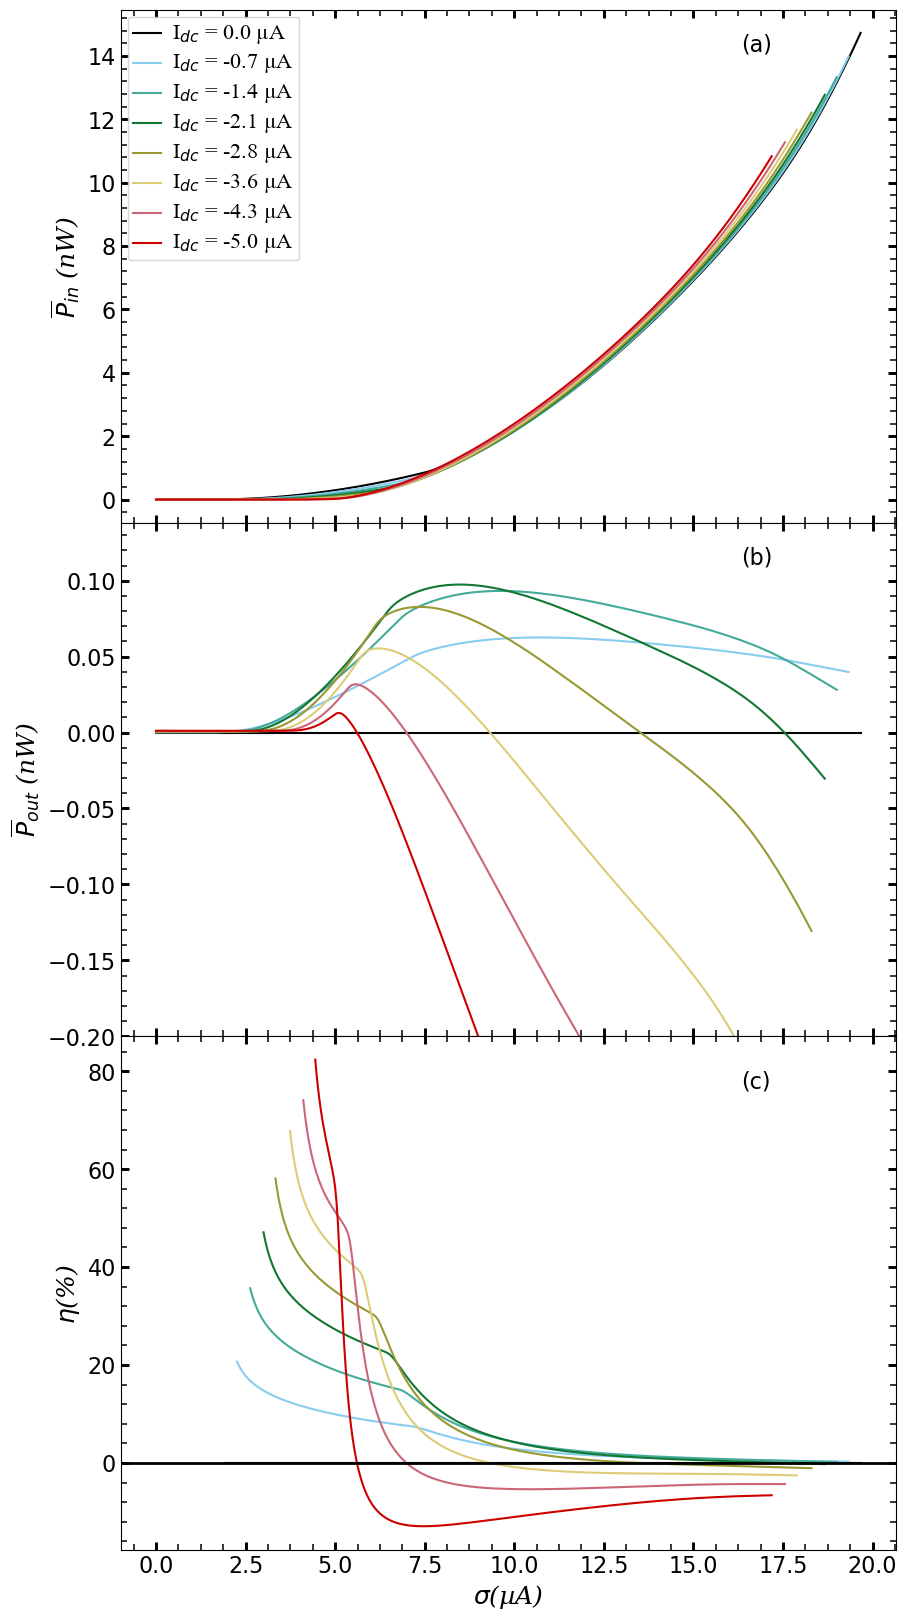

In [28]:
#Simulation of Vdc, Pout, Pin and eta of GaussianNoiseDrive from asymmetric IVC
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import matplotlib.font_manager as fm



path0 = '/Users/alirezajozani/Documents/1.4idc'
path1 = '/Users/alirezajozani/Documents/1.4idc'
path2 = '/Users/alirezajozani/Documents/1.4idc'
path3 = '/Users/alirezajozani/Documents/1.4idc'



fig, axs = plt.subplots(3, figsize=(12, 10), sharex=True, sharey=False)
axis_font = {'fontname':'Arial', 'size':'30'}
fig.set_size_inches(10, 20)
fig.subplots_adjust(wspace=0.4, hspace=0)
#gs = fig.add_gridspec(4, hspace=-2)
axs[0].tick_params(labelsize=16)
axs[1].tick_params(labelsize=16)
axs[2].tick_params(labelsize=16)
#gs = fig.add_gridspec(4, hspace=-2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
colors = ['black', '#88CCEE', '#44AA99', '#117733', '#999933', '#DDCC77', '#CC6677', '#CD0000']
#33228

# Load the data from the file
data = np.loadtxt('205-IV_av@H=-69mA.dat')

# Extract the voltage and current columns from the data
voltage = data[:, 0]
current = data[:, 1]

# Check that the current values are increasing
diffs = np.diff(current)
if not np.any(diffs > 0):
    print("Error: The current values are not increasing!")
    

def fnV(I):
    # Check that I is within the range of current values in the data
    Imax = np.max(data[:, 1])
    Imin = np.min(data[:, 1])
    if not np.any((I >= Imin, I <= Imax)):
        raise ValueError("Error: I value out of range!")
    #np.clip(I, Imax, Imin)
    V = np.interp(I, data[:, 1], data[:, 0])
    return V

# Define the parameters
#sigma = 1e-05
#I_values = np.linspace(np.min(current), np.max(current), N)
N = 811
intLimit= 2  #integration of units of sigma
sigma_values = np.linspace(1e-12, 30e-06, 811)

#d_Iac =  (2 *intLimit*sigma)/N   (define it under the loop)



#idc_values = [-1.4e-06]
idc_values = [0, -0.7e-06, -1.4e-06, -2.1e-06, -2.8e-06, -3.6e-06, -4.3e-06, -5e-06]


Imin = np.min(current)
Imax = np.max(current)
#dI = (np.max(current) - np.min(current)) / (N)



meanV_values = np.full((len(idc_values), len(sigma_values)), np.nan)
meanP_values= np.full((len(idc_values), len(sigma_values)), np.nan)
meanPout_values= np.full((len(idc_values), len(sigma_values)), np.nan)
eta_values= np.full((len(idc_values), len(sigma_values)), np.nan)


for i, idc in enumerate(idc_values):
    for s, sigma in enumerate(sigma_values):
        d_Iac =  (2 *intLimit*sigma)/N
        if (Imin<= intLimit*sigma+idc <= Imax) and (Imin<= -intLimit*sigma+idc <= Imax):
            I_values = np.linspace(-intLimit*sigma, intLimit*sigma, N)
            meanV = 0
            meanPin = 0
            meanPout = 0
            eta = 0
            #NormalizedI=0
            for Iac in I_values:
                G = np.exp(-(Iac*Iac) / (2*sigma*sigma)) / (sigma*np.sqrt(2*np.pi))
                #NormalizedI += G*dIac
                V = fnV(Iac + idc )
                Vbar = (V*G) * d_Iac
                meanV += Vbar
                Pin = V*Iac*G*d_Iac
                meanPin += Pin
                meanPout += V*idc*G*d_Iac  # Accumulate meanPout values
            
            # Check if meanPin exceeds a maximum value
            max_meanPin = 1.0  # set the maximum allowed value for meanPin
            if meanPin > max_meanPin:
                meanPin = max_meanPin

            meanV_values[i, s] = meanV 
            meanP_values[i, s] = meanPin
            meanPout_values[i, s] = -meanPout  # Store meanPout values

    # Calculate efficiency
    for s, sigma in enumerate(sigma_values):
        if meanP_values[i, s] <= 5e-12 or np.isnan(meanP_values[i, s]) or np.isinf(meanP_values[i, s]) or np.isinf(meanPout_values[i, s]):
            eta = np.nan
        else:
            eta = meanPout_values[i, s] / meanP_values[i, s]
        
        # Apply a maximum value to eta if meanPin is greater than the cutoff
        if meanPin > max_meanPin:
            eta = min(eta, max_meanPin / meanPin)
        
        eta_values[i, s] = eta        
        
     # plot the results
    #axs[0].plot(sigma_values*1e6, meanV_values[i]*1e06, color=colors[i % len(colors)], label=r'I$_{{dc}}$ = {:.1f} µA'.format(idc*1e6))
    #np.savetxt(path0 + 'MeanV_values.dat', np.column_stack((sigma_values, meanV_values[i])), header='meanV_values')
    axs[0].plot(sigma_values*1e6, meanP_values[i]*1e9, color=colors[i % len(colors)], label=r'I$_{{dc}}$ = {:.1f} µA'.format(idc*1e6))
    np.savetxt(path1 + 'MeanP_values.dat', np.column_stack((sigma_values, meanP_values[i])), header='meanP_values')
    axs[1].plot(sigma_values*1e6, meanPout_values[i]*1e9, color=colors[i % len(colors)], label=r'I$_{{dc}}$ = {:.1f} µA'.format(idc*1e6))
    np.savetxt(path2 + 'MeanPout_values.dat', np.column_stack((sigma_values, meanPout_values[i])), header='meanPout_values')
    axs[2].plot(sigma_values*1e6, eta_values[i]*100, color=colors[i % len(colors)], label=r'I$_{{dc}}$ = {:.1f} µA'.format(idc*1e6))
    np.savetxt(path3 + 'Eta_alues.dat', np.column_stack((sigma_values, eta_values[i])), header='eta_values')
    # Save the data to a file
    
    
font_path = fm.findfont(fm.FontProperties(family="Times New Roman"))
serif_font = fm.FontProperties(fname=font_path)

    


#plt.xlim(left=0)

axs[0].yaxis.set_minor_locator(tck.AutoMinorLocator(5))
axs[0].xaxis.set_minor_locator(tck.AutoMinorLocator(4))
axs[0].tick_params(axis='x',which='minor', length=4, width=1.1, direction="in") # direction="in"
axs[0].tick_params(axis='x', which='major', length=6, width=2.1, direction='in')
axs[0].tick_params(axis='y',which='minor',  length=4, width=1.1, direction='in')
axs[0].tick_params(axis='y', which='major', length=6, width=2.1, direction='in')
axs[0].xaxis.set_ticks_position('default')
axs[0].yaxis.set_ticks_position('default')
axs[0].set_xlabel("$\sigma$(µA)", fontname="serif",  style='italic', fontsize=18)
axs[0].set_ylabel( "$\overline{P}_{in}$ (nW)", fontname="serif", style='italic', fontsize=18)
axs[0].xaxis.set_tick_params(labelsize=16)
axs[0].yaxis.set_tick_params(labelsize=16)
axs[0].legend(prop=serif_font, loc='upper left', fontsize=14)
#axs[1].set_ylim(top=12)
#axs[1].set_ylim(bottom=-20)

# Increase legend font size
leg = axs[0].legend(prop=serif_font, loc='upper left')
for text in leg.get_texts():
    text.set_fontsize(16)
    
    
'''#EXP DATA OF P_OUT    
#I_ac0 = [0,0,0,0,0,0] 
I_ac1 = [4e-06, 6.5e-06, 9e-06, 12e-06, 14.5e-06, 15e-06] 
I_ac2= [4.7e-06, 6.9e-06, 9.1e-06, 11.3e-06, 13.8e-06 , 14.6e-06]
I_ac3= [5.4e-06, 7.4e-06, 9.2e-06, 11.1e-06, 13e-06, 13.8e-06] 
I_ac4= [ 6.2e-06, 7.7e-06, 9.2e-06, 10.7e-06, 12.2e-06, 12.9e-06] 
I_ac5= [ 7e-06, 8.2e-06, 9.3e-06, 10.4e-06, 11.5e-06, 12.2e-06] 
I_ac6= [ 7.7e-06, 8.45e-06, 9.2e-06, 9.95e-06, 10.7e-06, 11.3e-06]
I_ac7= [ 8.5e-06, 8.87e-06, 9.24e-06, 9.63e-06, 10.07e-06, 10.4e-06]     
    

#P_out_0 = [0,0,0,0,0,0]
P_out_1 = [-2.70E-12, -2.75E-11, -5.85E-11, -9.72E-11, -1.27E-10, -1.19E-11]
P_out_2 = [-5.00E-12, -4.50E-11, -9.75E-11, -1.52E-10, -2.12E-10, -1.81E-11]
P_out_3 = [-6.60E-12, -5.60E-11, -1.18E-10, -1.86E-10, -2.55E-10, -2.12E-10]
P_out_4 = [-1.00E-11, -5.70E-11, -1.20E-10, -1.90E-10, -2.59E-10, -2.22E-10]
P_out_5 = [-1.15E-11, -5.38E-11, -1.09E-10, -1.69E-10, -2.26E-10, -1.37E-10]
P_out_6 = [-1.45E-11, -4.12E-11,  -8.00E-11, -1.23E-10, -1.67E-10, -1.14E-10]
P_out_7 = [-1.80E-11, -3.22E-11, -5.00E-11, -7.10E-11, -8.93E-11, -5.20E-11]

axs[2].plot(I_ac1, P_out_1,'o' ,c='tab:blue',label='I_dc=-0.7μA')
axs[2].plot(I_ac2, P_out_2,'o' ,c='tab:orange', label='I_dc=-1.4μA')
axs[2].plot(I_ac3, P_out_3,'o' ,c='tab:green', label='I_dc=-2.1μA')
axs[2].plot(I_ac4, P_out_4,'o' ,c='tab:red', label='I_dc=-2.8μA')
axs[2].plot(I_ac5, P_out_5,'o' ,c='tab:purple', label='I_dc=-3.6μA')
axs[2].plot(I_ac6, P_out_6,'o' ,c='tab:brown', label='I_dc=-4.3μA')
axs[2].plot(I_ac7, P_out_7,'o' ,c='tab:pink', label='I_dc=-5µA')
#axs[0].set_title('Dose=500R_L=17750nm_W=300nm_H=+75mA', fontsize=12);
axs[2].legend(loc='upper left', fontsize=13)'''

axs[1].yaxis.set_minor_locator(tck.AutoMinorLocator(5))
axs[1].xaxis.set_minor_locator(tck.AutoMinorLocator(4))
axs[1].tick_params(axis='x',which='minor', length=4, width=1.1, direction="in") # direction="in"
axs[1].tick_params(axis='x', which='major', length=6, width=2.1, direction='in')
axs[1].tick_params(axis='y',which='minor',  length=4, width=1.1, direction='in')
axs[1].tick_params(axis='y', which='major', length=6, width=2.1, direction='in')
axs[1].xaxis.set_ticks_position('default')
axs[1].yaxis.set_ticks_position('default')
axs[1].set_xlabel("$\sigma$(µA)", fontname="serif",  style='italic', fontsize=18)
axs[1].set_ylabel( "$\overline{P}_{out}$ (nW)", fontname="serif", style='italic', fontsize=18)
axs[1].xaxis.set_tick_params(labelsize=16)
axs[1].yaxis.set_tick_params(labelsize=16)
#axs[1].legend(prop=serif_font, loc='lower right')
#axs[2].set_ylim(top=12)
axs[1].set_ylim(bottom=-0.2)

axs[2].yaxis.set_minor_locator(tck.AutoMinorLocator(5))
axs[2].xaxis.set_minor_locator(tck.AutoMinorLocator(4))
axs[2].tick_params(axis='x',which='minor', length=4, width=1.1, direction="in") # direction="in"
axs[2].tick_params(axis='x', which='major', length=6, width=2.1, direction='in')
axs[2].tick_params(axis='y',which='minor',  length=4, width=1.1, direction='in')
axs[2].tick_params(axis='y', which='major', length=6, width=2.1, direction='in')
axs[2].xaxis.set_ticks_position('default')
axs[2].yaxis.set_ticks_position('default')
axs[2].set_xlabel("$\sigma$(µA)", fontname="serif",  style='italic', fontsize=18)
axs[2].set_ylabel( "$\eta$(%) ", fontname="serif", style='italic', fontsize=18)
axs[2].xaxis.set_tick_params(labelsize=16)
axs[2].yaxis.set_tick_params(labelsize=16)
#axs[2].legend(prop=serif_font, loc='upper right')
#axs[3].set_ylim(bottom=-20)
#axs[3].set_xlim(right=10)



'''#experimental data of eta
#I_ac0=[0, 0, 8.9, 6.84, 5.45, 1.09]
I_ac1 = [ 4e-06, 6.5e-06, 9e-06, 12e-06, 14.5e-06, 15e-06] 
I_ac2=  [ 4.7e-06, 6.9e-06, 9.1e-06, 11.3e-06, 13.8e-06 , 14.6e-06]
I_ac3=  [ 5.4e-06, 7.4e-06, 9.2e-06, 11.1e-06, 13e-06, 13.8e-06] 
I_ac4=  [ 6.2e-06, 7.7e-06, 9.2e-06, 10.7e-06, 12.2e-06, 12.9e-06] 
I_ac5=  [ 7e-06, 8.2e-06, 9.3e-06, 10.4e-06, 11.5e-06, 12.2e-06] 
I_ac6=  [ 7.7e-06, 8.45e-06, 9.2e-06, 9.95e-06, 10.7e-06, 11.3e-06]
I_ac7=  [ 8.5e-06, 8.87e-06, 9.24e-06, 9.63e-06, 10.07e-06, 10.4e-06] 


eta1=[ 19.08, 11.89, 8.9, 6.84, 5.45, 1.09]
eta2=[ 32.02, 22.02, 17.27, 14.2, 11.2, 0.65]
eta3=[ 43.72, 30.03, 25.1, 21.1, 17.75, 9.32]
eta4=[ 48.79, 38.84, 32.76, 29, 25.3, 13.37]
eta5=[ 53.46, 45.09, 40.91, 37.07, 31.39, 9.4]
eta6=[ 61.1, 52.02, 49.43, 45.58, 40.69, 13.06]
eta7=[ 62.69, 58.28, 56, 53.18, 41.03, 11.66]
    
axs[3].plot(I_ac1, eta1,'o' ,c='tab:blue',label='I_dc=-0.7μA')
axs[3].plot(I_ac2, eta2,'o' ,c='tab:orange', label='I_dc=-1.4μA')
axs[3].plot(I_ac3, eta3,'o' ,c='tab:green', label='I_dc=-2.1μA')
axs[3].plot(I_ac4, eta4,'o' ,c='tab:red', label='I_dc=-2.8μA')
axs[3].plot(I_ac5, eta5,'o' ,c='tab:purple', label='I_dc=-3.6μA')
axs[3].plot(I_ac6, eta6,'o' ,c='tab:brown', label='I_dc=-4.3μA')
axs[3].plot(I_ac7, eta7,'o' ,c='tab:pink', label='I_dc=-5µA')
#gs = fig.add_gridspec(4, hspace=-2)
#axs[3].xticks(fontsize=16)
#axs[3].yticks(fontsize=16)
plt.xlim(right=2e-05)'''

h2= axs[2].axhline(y=0,color='black' ,lw=2)
h2.set_linestyle('-')
axs[0].text(0.8, 0.92, '(a)', transform=axs[0].transAxes, fontsize=16)
axs[1].text(0.8, 0.92, '(b)', transform=axs[1].transAxes, fontsize=16)
axs[2].text(0.8, 0.9, '(c)', transform=axs[2].transAxes, fontsize=16)









